In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("Zomato Dataset.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [6]:
df.shape

(45584, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [8]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


In [9]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [10]:
# STEP 2 : DATA PREPROCESSING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# ---------- Step 2.1 Handle Missing Values ----------
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
# ---------- Step 2.2 Define Target ----------
target_column = "Time_taken (min)"

X = df.drop(columns=[target_column])
y = df[target_column]

In [12]:
# ---------- Step 2.3 Identify Categorical Features ----------
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:", categorical_features)

Categorical Columns: ['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']


In [13]:
# ---------- Step 2.4 OneHot Encoding ----------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

In [14]:
# ---------- Step 2.5 Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (36467, 19)
Test set: (9117, 19)


In [15]:
# ---------- Step 2.6 Transform ----------
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

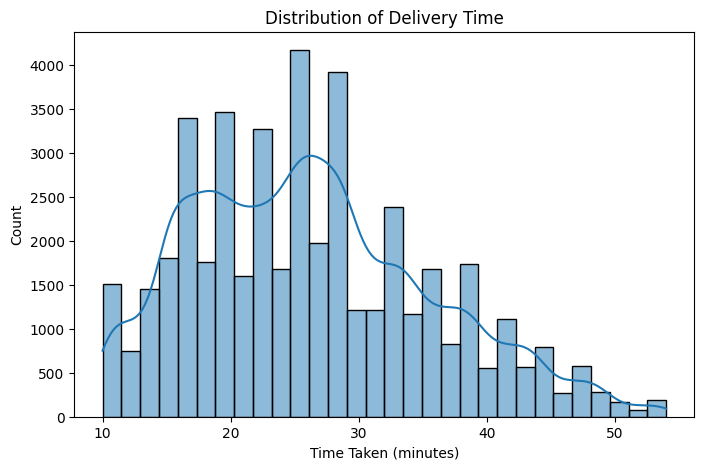

In [16]:
# Step 3


# Step 3.1 – Target Variable Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Time_taken (min)"], bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Count")
plt.show()

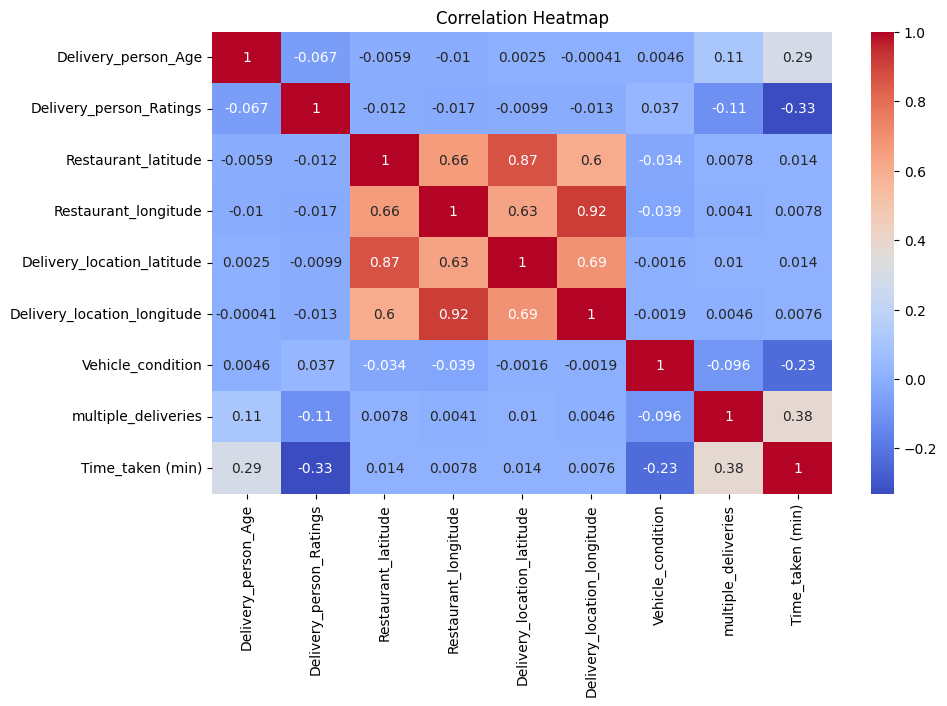

In [17]:
# Step 3.2 – Correlation Heatmap (Numerical Features)

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

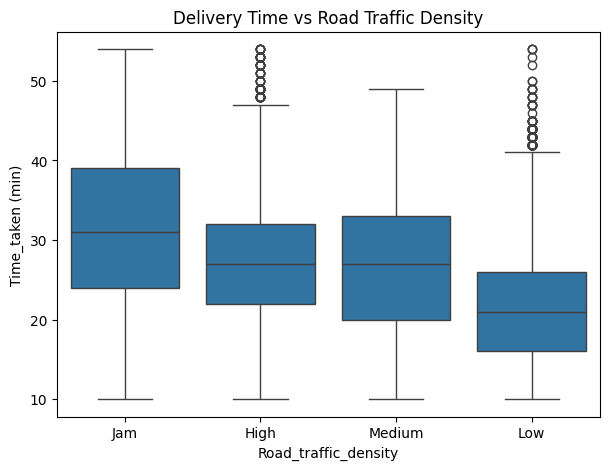

In [18]:
# Step 3.3 – Delivery Time vs Traffic Density

plt.figure(figsize=(7,5))
sns.boxplot(x="Road_traffic_density", y="Time_taken (min)", data=df)
plt.title("Delivery Time vs Road Traffic Density")
plt.show()


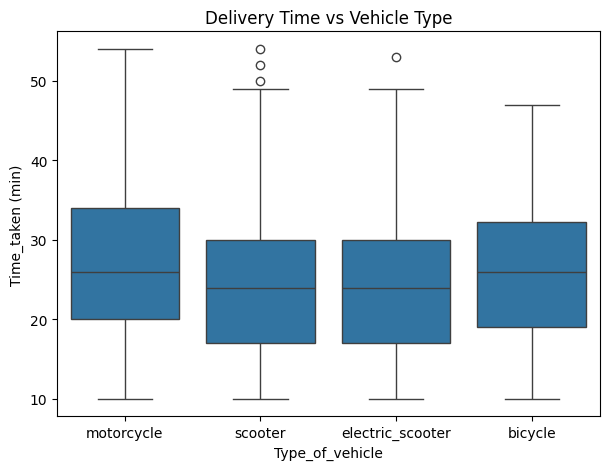

In [19]:
# Step 3.4 – Delivery Time vs Vehicle Type

plt.figure(figsize=(7,5))
sns.boxplot(x="Type_of_vehicle", y="Time_taken (min)", data=df)
plt.title("Delivery Time vs Vehicle Type")
plt.show()

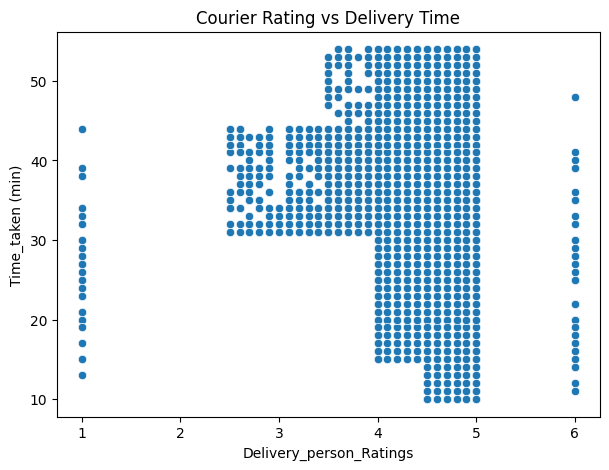

In [20]:
# Step 3.5 – Delivery Time vs Courier Rating

plt.figure(figsize=(7,5))
sns.scatterplot(x="Delivery_person_Ratings", y="Time_taken (min)", data=df)
plt.title("Courier Rating vs Delivery Time")
plt.show()

distance_km column created!


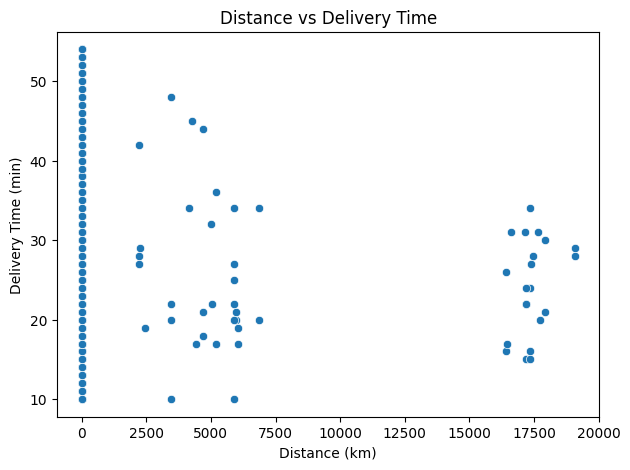

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Compute distance (vectorized Haversine) ----
lat1 = np.radians(df["Restaurant_latitude"])
lon1 = np.radians(df["Restaurant_longitude"])
lat2 = np.radians(df["Delivery_location_latitude"])
lon2 = np.radians(df["Delivery_location_longitude"])

dlat = lat2 - lat1
dlon = lon2 - lon1

a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
c = 2 * np.arcsin(np.sqrt(a))

df["distance_km"] = 6371 * c   # Earth radius in km

print("distance_km column created!")

# ---- Plot Distance vs Delivery Time ----
plt.figure(figsize=(7,5))

sns.scatterplot(
    x="distance_km",
    y="Time_taken (min)",
    data=df.sample(5000, random_state=42)   # sample to avoid RAM crash
)

plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()


/tmp/ipython-input-254996363.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["order_hour"] = pd.to_datetime(df["Time_Orderd"], errors='coerce').dt.hour


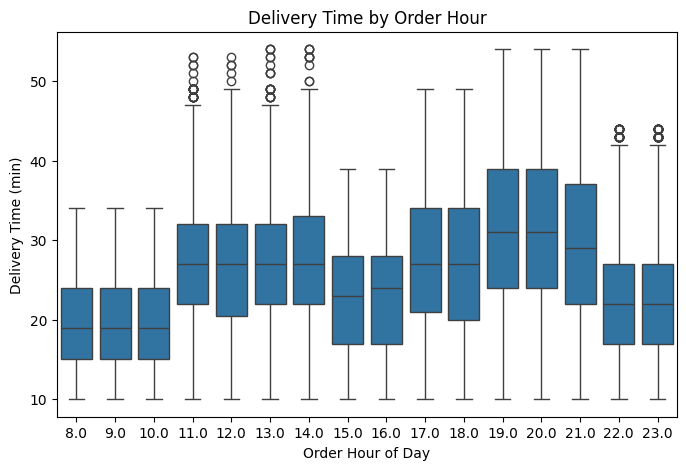

In [22]:
df["order_hour"] = pd.to_datetime(df["Time_Orderd"], errors='coerce').dt.hour

plt.figure(figsize=(8,5))
sns.boxplot(x="order_hour", y="Time_taken (min)", data=df)
plt.title("Delivery Time by Order Hour")
plt.xlabel("Order Hour of Day")
plt.ylabel("Delivery Time (min)")
plt.show()

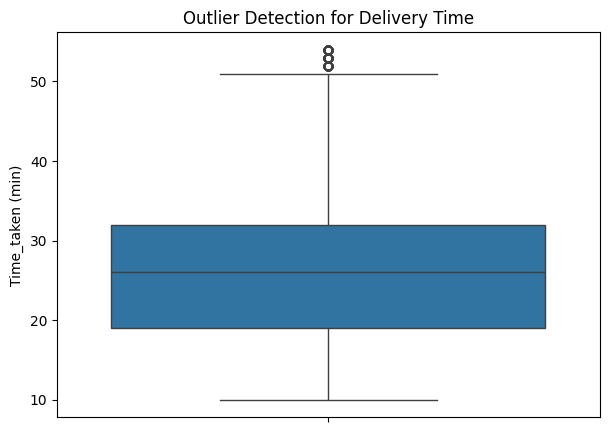

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df["Time_taken (min)"])
plt.title("Outlier Detection for Delivery Time")
plt.show()

In [24]:
# STEP 4 : MODEL TRAINING

# Common imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Step 4.1 : Baseline Model - Linear Regression

linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)

print("Linear Regression Model Trained")

Linear Regression Model Trained


In [25]:
# Step 4.2 : Random Forest Regressor

rf_model = RandomForestRegressor(
    n_estimators=50,     # reduced trees
    max_depth=15,        # limits tree growth
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_processed, y_train)

print("Random Forest Model Trained")

Random Forest Model Trained


In [26]:
# Step 4.3 : XGBoost Regressor

xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train_processed, y_train)

print("XGBoost Model Trained")


XGBoost Model Trained


In [27]:
# Step 4.4 : Ridge Regression

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_processed, y_train)

print("Ridge Regression Model Trained")

Ridge Regression Model Trained


In [34]:
# Step 5.1 : Hyperparameter Tuning for XGBoost

xgb_param_dist = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

xgb_random.fit(X_train_processed, y_train)
best_xgb_model = xgb_random.best_estimator_

print("Best XGB Params:", xgb_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGB Params: {'subsample': 0.8, 'n_estimators': 20, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------- Ensure test data is dense (important for Linear/Ridge/Lasso) ----------
if hasattr(X_test_processed, "toarray"):
    X_test_eval = X_test_processed.toarray()
else:
    X_test_eval = X_test_processed


# ---------- Evaluation Function ----------
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    return mae, rmse, r2


# ---------- Models (MUST be already fitted) ----------
models = {
    "Linear Regression": linear_model,
    "Random Forest": rf_model,
    "Ridge Regression": ridge_model,
    "Tuned XGBoost": best_xgb_model
}


# ---------- Evaluate Models ----------
results = []

for name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_test_eval, y_test)
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })


# ---------- Results Table ----------
results_df = pd.DataFrame(results)
print(results_df)


               Model   MAE  RMSE     R2
0  Linear Regression  4.83  6.05  0.585
1      Random Forest  3.78  4.87  0.731
2   Ridge Regression  4.82  6.04  0.586
3      Tuned XGBoost  6.60  8.33  0.214


In [46]:
import pickle

with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)